In [1]:
#pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [3]:
tf.__version__

'2.11.0'

In [4]:
gt = pd.read_csv("gas_turbines.csv")
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
gt.shape

(15039, 11)

In [6]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
#df.loc[:,['Maths Score','Name','Sr.no']]
gt=gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX','TEY']]

In [8]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [9]:
x = gt.iloc[:,0:-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [10]:
y = gt.iloc[:,-1]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
gt.shape

(15039, 11)

In [12]:
gt.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Creating Model

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Cpmpile model
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [18]:
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 2s 46ms/step - loss: 276.4278 - mse: 276.4278 - mae: 12.4333 - val_loss: 261.4425 - val_mse: 261.4425 - val_mae: 12.8913
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 257.2461 - mse: 257.2461 - mae: 12.0671 - val_loss: 249.5375 - val_mse: 249.5375 - val_mae: 12.4948
Epoch 3/50
13/13 [==============================] - 0s 10ms/step - loss: 243.1137 - mse: 243.1137 - mae: 11.6282 - val_loss: 233.9602 - val_mse: 233.9602 - val_mae: 11.0369
Epoch 4/50
13/13 [==============================] - 0s 10ms/step - loss: 233.4106 - mse: 233.4106 - mae: 11.2834 - val_loss: 221.5659 - val_mse: 221.5659 - val_mae: 10.7005
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 219.1681 - mse: 219.1681 - mae: 11.0500 - val_loss: 212.8058 - val_mse: 212.8058 - val_mae: 11.7163
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 206.2681 - mse: 206.2681 - mae: 10.8777 - val_loss: 195.2570 - 

Epoch 50/50
13/13 [==============================] - 0s 9ms/step - loss: 6.1761 - mse: 6.1761 - mae: 1.8418 - val_loss: 7.1818 - val_mse: 7.1818 - val_mae: 2.0603


In [19]:
model.save_weights("mywt.kmw")

In [20]:
#evaluate the model
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 3ms/step - loss: 7.5141 - mse: 7.5141 - mae: 2.0971
mse: 751.41%


In [21]:
#Visualize training history
#list all data in history

model.history.history.keys()
import matplotlib.pyplot as plt

In [22]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

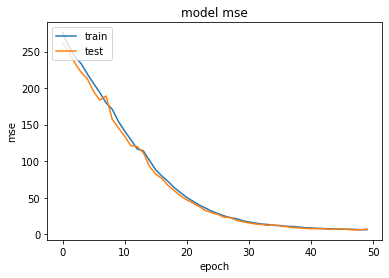

In [23]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

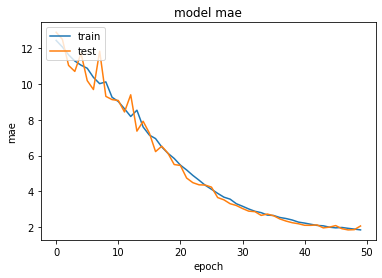

In [24]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

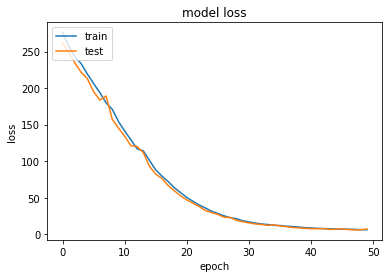

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# evaluate the model

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test,y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse,test_rmse))

94/94 [==============================] - 0s 3ms/step
Training set rmse: 2.741, Testing set rmse: 2.680


# Randomzied SearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [28]:
# Building a keras regression model

def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [29]:
# Wrapping the keras model in a object

keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [30]:
# Define the search parameters

batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


# Create a dictionary of the parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
# Summarize the results
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -3.4350714683532715
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.01, 'init': 'normal', 'epochs': 50, 'batch_size': 100, 'activation_function': 'linear'}


In [32]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/50
121/121 [==============================] - 2s 7ms/step - loss: 410.5327 - mse: 410.5327 - mae: 14.0478 - val_loss: 155.0907 - val_mse: 155.0907 - val_mae: 9.8240
Epoch 2/50
121/121 [==============================] - 1s 4ms/step - loss: 75.0264 - mse: 75.0264 - mae: 6.3083 - val_loss: 19.7030 - val_mse: 19.7030 - val_mae: 3.3169
Epoch 3/50
121/121 [==============================] - 1s 4ms/step - loss: 20.8686 - mse: 20.8686 - mae: 3.3557 - val_loss: 10.6341 - val_mse: 10.6341 - val_mae: 2.6780
Epoch 4/50
121/121 [==============================] - 1s 4ms/step - loss: 11.4385 - mse: 11.4385 - mae: 2.6545 - val_loss: 40.2673 - val_mse: 40.2673 - val_mae: 6.1235
Epoch 5/50
121/121 [==============================] - 0s 4ms/step - loss: 9.7702 - mse: 9.7702 - mae: 2.4526 - val_loss: 35.6639 - val_mse: 35.6639 - val_mae: 5.7321
Epoch 6/50
121/121 [==============================] - 0s 4ms/step - loss: 9.1843 - mse: 9.1843 - mae: 2.3615 - val_loss: 12.1687 - val_mse: 12.1687 - val_mae

In [33]:
# evaluate the model

y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 2ms/step
Training set rmse : 1.958, Testing set rmse: 1.982


In [34]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,2.741183,2.679883
1,tuned model,1.957851,1.982437


For both base model and tuned model, the difference between rmse for train and test set is very low indicating almost no overfitting.

For tuned model,the rmse has decreased compared to base model suggesting that hypertuning parameters has increased the efficiency of this regression model